### ENSIMAG – Grenoble INP – UGA - Academic year 2024-2025
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2025-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Alexandre Wendling -- `alexandre.wendling@univ-grenoble-alpes.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP3: Benchmarking classification methods (25 points)

In this TP, we will be using mostly the packages `numpy`, `sklearn`, and `matplotlib`.

## ▶️ Part 1 (9 points)

Consider a simulated dataset generated as follows:

----
### -- Step 1
For each data point $i$, sample its label from a Bernoulli distribution $y_i \sim \mathcal{B}(p)$, i.e. $y_i = 1$ with probability $p$ and $y_i = 0$ with probability $1-p$. Note that to sample a random variable $B$ from $\mathcal{B}(p)$ you can first sample $U$ from an uniform distribution as in `U = numpy.random.rand()` and then note that $B = \mathbf{1}(U < p)$ where $\mathbf{1}(\cdot)$ is an indicator function.

### -- Step 2

Then, depending on the label $y_i \in \{0, 1\}$ the associated data point $\mathbf{x}_i \in \mathbb{R}^2$ is sampled as follows:

$$
  \mathbf{x}_i \mid y_i = 0 \sim \mathcal{N}(\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0) \quad \text{and} \quad \mathbf{x}_i \mid y_i = 1 \sim \mathcal{N}(\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1)
$$

where $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ is a multivariate normal distribution with mean $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ with pdf

$$
p_{\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})}(x) = \dfrac{1}{2\pi\sqrt{\det{\boldsymbol{\Sigma}}}}\exp\left(-\dfrac{1}{2}\big(\boldsymbol{x}-\boldsymbol{\mu}\big)^\top \boldsymbol{\Sigma}^{-1}\big(\boldsymbol{x}-\boldsymbol{\mu}\big)\right)
$$
and
$$
\boldsymbol{\mu}_0 = \left[\begin{array}{c}0 \\ 0\end{array}\right] \quad \boldsymbol{\mu}_1 = \left[\begin{array}{c}\varepsilon \\ 0\end{array}\right] \quad \boldsymbol{\Sigma}_0 = \left[\begin{array}{cc}0.5 & 0 \\ 0 & 0.5\end{array}\right] \quad \boldsymbol{\Sigma}_1 = \left[\begin{array}{cc}0.4 & 0 \\ 0 & 0.4\end{array}\right]
$$

Note that to sample a $p$-dimensional vector $\mathbf{x}$ from $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$, you can use function `numpy.random.multivariate_normal`.

----

We will denote a set of $N$ data points $\{(\mathbf{x}_i, y_i)\}_{i = 1}^N$ simulated with $\varepsilon$ and $p$ as $\mathcal{D}(N \mid \varepsilon, p)$. 

Define two datasets:
$$
\mathcal{D}_\text{train} = \mathcal{D}(50 \mid 2, 0.30) \quad \text{and} \quad \mathcal{D}_{\text{test}} = \mathcal{D}(10^3 \mid 2, 0.30)~.
$$

**(a)** Plot the data points in $\mathcal{D}_\text{train} \cup \mathcal{D}_\text{test}$ using different colors to indicate the classes of each data point and different pointing symbols to indicate whether a point is from the train or test set. You should use `matplotlib`'s function for scatterplots. Remember to always include a legend in your figure.

**(b)** What is the mathematical expression for the optimal Bayes classifier in this setting? And for its boundary region? Remember that the Bayes classifier can be written in terms of the ratio of $\text{Prob}(Y = 1 \mid \mathbf{x})$ over $\text{Prob}(Y = 0 \mid \mathbf{x})$ and that the values of $\mathbf{x} \in \mathbb{R}^2$ for which this ratio is 1 are those defining its boundary. Beware, however, that in this exercise we're considering $\text{Prob}(Y = 1) = p$ and $\text{Prob}(Y = 0) = 1-p$, so they are not necessarily always equal.

**(c)** Implement a Bayes classifier for this setup using scikit-learn's API as explained [here](https://scikit-learn.org/stable/developers/develop.html). This means that you will be writing a new classifier that follows the same logic and API as scikit-learn, but does not exist in the package. Use your implementation to estimate the error of the Bayes classifier on the samples from $\mathcal{D}(10^4 \mid 2, 0.3)$. How would you expect your results to change for other values of $\varepsilon$? Plot a curve showing how the Bayes error rate changes for different choices $\varepsilon$ (note that you will have to generate new datasets for this).

**(d)** Given the structure of the model generating the datasets, which classifier presented in our lectures seems to be the most adequate? Justify your answer in terms of the assumptions behind the construction of each classifier.

**(e)** Using `sklearn`, train a LDA, a QDA, and a logistic regression classifier on $\mathcal{D}_\text{train}$ and estimate their errors on the samples from $\mathcal{D}_\text{test}$. How do their errors compare to the value obtained in (c)? Can we expect the gap between the Bayes error rate and test error for each classifier change when the number of samples in $\mathcal{D}_{\text{train}}$ in change? Justify your answer both theoretically and empirically.

**(f)** Consider a new test set defined as $\mathcal{D}'_\text{test} = \mathcal{D}(1000 \mid 0.5, 0.7)$. Use the same classifiers trained in (e) and estimate their new test errors. Do you observe any difference in the results? Can you explain what is happening?

## ▶️ Part 2 (8 points)

In this part, we will consider a simulated benchmark similar to that from [Section 4.5.2 in James et al](https://www.statlearning.com/) presented and discussed in class. Our benchmark will compare the performance of four classifiers under three different scenarios.

### -- Scenario 1
The observations for this scenario are generated as per:

$$
\{(\mathbf{x}_i, y_i)\}_{i = 1}^{2N} = \{(\mathbf{x}_i, 0)\}_{i = 1}^{N} \cup \{(\mathbf{x}_i, 1)\}_{i = 1}^{N}
$$
with
$$
\mathbf{x}_i | y_i = 0 \sim \mathcal{N}(\mathbf{\mu}_0, \mathbf{\Sigma}_0) \quad \text{with} \quad \mathbf{\mu}_0 = \left[\begin{array}{c}0 \\ 0\end{array}\right] \quad \text{and} \quad \mathbf{\Sigma}_0 = \left[\begin{array}{cc}1 & 0 \\ 0 & 2\end{array}\right]
$$
and
$$
\mathbf{x}_i | y_i = 1 \sim \mathcal{N}(\mathbf{\mu}_1, \mathbf{\Sigma}_1) \quad \text{with} \quad \mathbf{\mu}_1 = \left[\begin{array}{c}1 \\ 1\end{array}\right] \quad \text{and} \quad \mathbf{\Sigma}_1 = \left[\begin{array}{cc}1 & 0 \\ 0 & 2\end{array}\right]~.
$$

The training set always have $N=20$ and the test set $N=5000$. 

**(a)** Using `sklearn`, compare the performances of LDA, logistic regression, Gaussian naive Bayes, and QDA in this scenario. For this, you should generate 100 pairs of training-test datasets and evaluate the test errors for each of the classifiers. Use `matplotlib.pyplot.boxplot` to display the results for each of the classifiers along the different realizations. Explain the differences of the performances in terms of the assumptions of each classifier and the structure of the data generating mechanism.

### -- Scenario 2
The observations for this scenario are generated as per:

$$
\{(\mathbf{x}_i, y_i)\}_{i = 1}^{2N} = \{(\mathbf{x}_i, 0)\}_{i = 1}^{N} \cup \{(\mathbf{x}_i, 1)\}_{i = 1}^{N}
$$
with
$$
\mathbf{x}_i | y_i = 0 \sim \mathcal{N}(\mathbf{\mu}_0, \mathbf{\Sigma}_0) \quad \text{with} \quad \mathbf{\mu}_0 = \left[\begin{array}{c}0 \\ 0\end{array}\right] \quad \text{and} \quad \mathbf{\Sigma}_0 = \left[\begin{array}{cc}1 & -0.7 \\ -0.7 & 2\end{array}\right]
$$
and
$$
\mathbf{x}_i | y_i = 1 \sim \mathcal{N}(\mathbf{\mu}_1, \mathbf{\Sigma}_1) \quad \text{with} \quad \mathbf{\mu}_1 = \left[\begin{array}{c}1 \\ 1\end{array}\right] \quad \text{and} \quad \mathbf{\Sigma}_1 = \left[\begin{array}{cc}1 & -0.7 \\ -0.7 & 2\end{array}\right]~.
$$

The training set always have $N=20$ and the test set $N=5000$. 

**(b)** Perform the same comparison as done for Scenario 1.


### -- Scenario 3
The observations for this scenario are generated as per:

$$
\{(\mathbf{x}_i, y_i)\}_{i = 1}^{2N} = \{(\mathbf{x}_i, 0)\}_{i = 1}^{N} \cup \{(\mathbf{x}_i, 1)\}_{i = 1}^{N}
$$
with
$$
\mathbf{x}_i | y_i = 0 \sim \mathcal{N}(\mathbf{\mu}_0, \mathbf{\Sigma}_0) \quad \text{with} \quad \mathbf{\mu}_0 = \left[\begin{array}{c}0 \\ 0\end{array}\right] \quad \text{and} \quad \mathbf{\Sigma}_0 = \left[\begin{array}{cc}1 & -0.7 \\ -0.7 & 2\end{array}\right]
$$
and
$$
\mathbf{x}_i | y_i = 1 \sim \mathcal{N}(\mathbf{\mu}_1, \mathbf{\Sigma}_1) \quad \text{with} \quad \mathbf{\mu}_1 = \left[\begin{array}{c}1 \\ 1\end{array}\right] \quad \text{and} \quad \mathbf{\Sigma}_1 = \left[\begin{array}{cc}1 & +0.7 \\ +0.7 & 2\end{array}\right]~.
$$

The training set always have $N=20$ and the test set $N=5000$. 

**(c)** Perform the same comparison as done for Scenarios 1 and 2.

## ▶️ Part 3: Real data (8 points)

In this part we will consider the Titanic dataset available [here](https://www.kaggle.com/competitions/titanic/data). The goal here will be to build a machine learning model that predicts which passengers survived the Titanic shipwreck. Each passenger (i.e., data point) is composed of a set of categorical and continuous features, and its labels are either 0 (dead) or 1 (survived).

First of all, you should download both the `training` and the `test` datasets.

-- The `training` set should be used to build your machine learning models. The labels for each passenger are provided. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

-- The `test` set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

Follow the guidelines from [here](https://www.kaggle.com/competitions/titanic/overview) to understand how to submit the results of your predictions on the `test` set and obtain the score of your model.

### Suggestions:

-- Don't hesitate to do some exploratory data analysis before building your machine learning model. You chould check, for instance, which kind of cross-validator seems the most appropriate for assessing the score of your classifier : are the data points completely IID? are they ordered somehow? split into groups? Beware of all this.

-- Since you will be handling predictors with different data types, it might be useful to take a look at the concept of `ColumnTransformer` from scikit-learn [here](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). You could also check these two videos about how to build complext pipelines [1](https://www.youtube.com/watch?v=7TZ7j4HSzmE) and [2](https://www.youtube.com/watch?v=lhMqqauXtW0).

-- Take a look at the package [`skrub`](https://skrub-data.org/stable/). You would be surprised with how easy it is to get a very good score on this dataset using `tabular_learner`.

**(a)** Explain the feature engineering that you had to do with the dataset. If you've used `skrub`, explain how the encoding for each kind of predictor was decided.

First, we conduct a preliminary data analysis. We'll examine the survival probabilities based on passengers' sex and boarding class. We will also project the data on the first two principal components to visualize it on a scatter, the color of the points indicating if the represented passenger survived or not.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

We noticed that in the column `Age` some values are missing. For this category, we chose to define a new categorical predictor `Age_Category` including an "Undefinded" category. This allows to make the model more robust to this missing data problem.

In [91]:
def categorize_age(age):
    if pd.isna(age):
        return "Undefined"
    elif age <= 2:
        return "Baby"
    elif age <= 12:
        return "Child"
    elif age <= 17:
        return "Teenager"
    elif age <= 30:
        return "Young Adult"
    elif age <= 60:
        return "Adult"
    else:
        return "Senior"

In [92]:
def print_tables(dataset):
    survival_counts = dataset.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="sum")
    total_counts = dataset.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="count")

    survival_table = survival_counts / total_counts
    survival_table["Total"] = survival_counts.sum(axis=1) / total_counts.sum(axis=1)
    survival_table.loc["Total"] = survival_counts.sum(axis=0) / total_counts.sum(axis=0)
    survival_table.loc["Total", "Total"] = survival_counts.sum().sum() / total_counts.sum().sum()
    print("Survival Rate by Sex and Boarding Class:")
    print(survival_table.round(2))

    survival_counts_age = dataset.pivot_table(index="Age_Category", values="Survived", aggfunc="sum")
    total_counts_age = dataset.pivot_table(index="Age_Category", values="Survived", aggfunc="count")

    survival_table_age = survival_counts_age / total_counts_age
    survival_table_age.columns = ["Survival Rate"]
    survival_table_age = survival_table_age.sort_index()  # Trie les catégories d'âge dans l'ordre

    print("\nSurvival Rate by Age Category:")
    print(survival_table_age.round(2))

 We dropped columns that we judged irrelevnat such as `Name`, `Cabin`, `Ticket`, and `PassengerId`. Categorical variables like `Sex`, `Embarked`, and `Age_Category` have been one-hot encoded, while redundant categories (`Age`, `Sex_male`, `Embarked_S`, and `Age_Category_Undefined`) have been removed.

We noticed that other columns like `Fare` have missing data. In these columns we chose to approximate those missing values by using the median of the column. Finally, we normalized the numerical predictors in the training dataset and used the same scaler to normalize the test dataset.

In [ ]:
def get_dataset(filepath, train_set=True, printTables=True):
    # Loading dataset
    dataset = pd.read_csv(filepath)

    dataset["Age_Category"] = dataset["Age"].apply(categorize_age)

    id = dataset["PassengerId"]

    if train_set:
        if printTables:
            print_tables(dataset)
        y = dataset["Survived"]
        dataset.drop(columns=["Survived"], inplace=True)

    # Dropping useless columns
    dataset.drop(columns=["PassengerId", "Name", "Cabin", "Ticket", "Age"], inplace=True)

    # Creating dummy variables
    dataset = pd.get_dummies(dataset, columns=["Sex", "Embarked", "Age_Category"], dtype=np.float64)
    dataset.drop(columns=["Sex_male", "Embarked_S", "Age_Category_Undefined"], inplace=True)

    # Filling columns containing NaN values
    dataset.fillna(dataset.median(), inplace=True)
    
    if train_set:
        return dataset, y, id
    return dataset, id

def pca_transform(X):
    pca = PCA()
    X_pca = pca.fit_transform(X)
    return X_pca, pca

train_dataset, y_train, id_train = get_dataset("titanic/train.csv")
test_dataset, id_test = get_dataset("titanic/test.csv", False)

# Make a copy of the training dataset for scaling
X_scaled_train = train_dataset.copy()
X_scaled_test = test_dataset.copy()

# Columns to standardize
columns_to_standardize = ['Fare']

# Apply StandardScaler only to the selected columns
scaler = StandardScaler()
X_scaled_train[columns_to_standardize] = scaler.fit_transform(X_scaled_train[columns_to_standardize])
X_scaled_test[columns_to_standardize] = scaler.transform(X_scaled_test[columns_to_standardize])

Survival Rate by Sex and Boarding Class:
Pclass     1     2     3  Total
Sex                            
female  0.97  0.92  0.50   0.74
male    0.37  0.16  0.14   0.19
Total   0.63  0.47  0.24   0.38

Survival Rate by Age Category:
              Survival Rate
Age_Category               
Adult                  0.42
Baby                   0.62
Child                  0.56
Senior                 0.23
Teenager               0.48
Undefined              0.29
Young Adult            0.35




The data shows that survival rates varied significantly based on sex, class, and age. Women had a much higher chance of survival ($74$% on average) compared to men ($19$%), with an even greater advantage in first and second class ($97$% and $92$% vs. only $50$% in third class). Similarly, first-class passengers had the highest survival rate ($63$%), followed by second class ($47$%) and third class ($24$%).

When analyzing age categories, babies ($62$%) and children ($56$%) had the highest survival rates, followed by teenagers ($48$%) and adults ($42$%). In contrast, young adults ($35$%) and seniors ($23$%) had lower survival rates. This suggests the younger a passenger was the more likely he was to survive. Finally, passengers with an undefined age had an intermediate survival rate ($29$%), which may indicate a random distribution among the other categories.

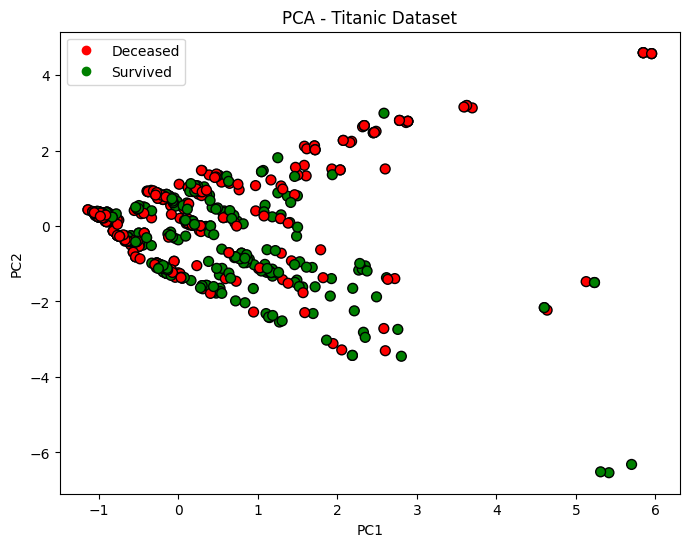

In [ ]:
X_scaled_pca, pca_model = pca_transform(X_scaled_train)

import matplotlib.colors as mcolors

colors = ["red", "green"]
cmap = mcolors.ListedColormap(colors)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=y_train, cmap=cmap, edgecolors='k', s=50)

legend_labels = ["Deceased", "Survived"]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.title("PCA - Titanic Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In this last part, we visualize the data as a scatter plot using the first two principal components, where each point represents a passenger. The color of the points indicates survival status: yellow for survivors and purple for non-survivors. This step is purely for visualization, providing an initial insight into the dataset and its distribution.

**(b)** What type of classifier did you end up using? Why? What was your score in the public leaderboard from Kaggle?

To select the best classification model, we implemented a cross-validation function, as done in the TP2, that takes the training data and a model pipeline as input. This function utilizes Stratified K-Fold cross-validation, which ensures that each fold maintains the same proportion of class distributions as the original dataset. By partitioning the dataset into multiple folds, the model is trained on a subset of the data and evaluated on the remaining portion in each iteration. This process reduces the risk of overfitting and provides a more reliable assessment of the model’s performance.

To measure the model’s ability to distinguish between classes, we compute the Receiver Operating Characteristic (ROC) curve. The Area Under the Curve (AUC) is then calculated to quantify the classifier’s effectiveness, where a value close to 1 indicates excellent performance, while a value near 0.5 suggests a model that performs no better than random guessing.

To determine the optimal classification threshold, we identify the point on the ROC curve that is closest to the top-left corner.

To ensure a robust evaluation, we aggregated the results across all folds. The AUC scores and accuracy values are averaged to provide a comprehensive measure of the model's performance, along with their standard deviations to account for variability across different data splits. By analyzing these metrics, we can compare different models and select the one that generalizes best to unseen data.

Average Accuracy: 74.63 +/- 2.72 %
Average AUC: 80.71 +/- 3.63 %


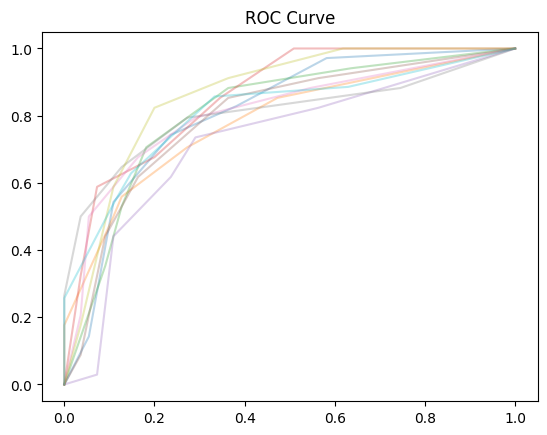

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.pipeline import make_pipeline

def cross_validation(X, y, model, n_splits=10, plot=False):
    """
    Effectue une validation croisée Stratified K-Fold et affiche la courbe ROC.
    
    Paramètres :
        - X : features du dataset
        - y : labels (target)
        - model : pipeline sklearn à évaluer
        - n_splits : nombre de folds pour la cross-validation (par défaut : 5)
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    aucs = []
    optimal_thresholds = []
    accuracies = []
    
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        distances_upper_left_corner = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
        optimal_thresholds.append(thresholds[np.argmin(distances_upper_left_corner)])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        if plot:
            plt.title("ROC Curve")
            plt.plot(fpr, tpr, alpha=0.3, label=f'Fold AUC = {roc_auc:.2f}')

        y_pred = (y_proba >= optimal_thresholds[-1]).astype(int)
        
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    optimal_threshold = np.median(optimal_thresholds)
    
    return mean_acc, std_acc, mean_auc, std_auc, optimal_threshold


pipeline = make_pipeline(PCA(n_components=3), KNeighborsClassifier())
mean_acc, std_acc, mean_auc, std_auc, threshold = cross_validation(X_scaled_train, y_train, pipeline, plot=True)

print(f"Average Accuracy: {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
print(f"Average AUC: {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")

The code above implements the cross-validation function described earlier and applies it to a simple model as an example.

Now, we will test various classification algorithms (KNN, Decision Tree, LDA, QDA, Logistic Regression) to create classification models and evaluate their performance. In addition to testing these models with the raw data, we will also explore whether projecting the data onto principal components using PCA improves the quality of the models. By testing with different numbers of principal components, we extpect to assess whether the reduction of the number of dimensions helps in better classifying the data. The evaluation will be based on metrics such as AUC, helping us determine the most effective model and the optimal number of components for PCA.

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

def test_lda_qda():
    print("----------Evaluation de LDA--------")
    
    pipeline_lda = make_pipeline(LDA())
    mean_acc, std_acc, mean_auc_lda, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline_lda)
    print(f"Average Accuracy (LDA sans PCA): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
    print(f"Average AUC (LDA sans PCA): {mean_auc_lda * 100:.2f} +/- {std_auc * 100:.2f} %")

    print("----------Evaluation de LDA avec PCA--------")
    for i in range(1, 9):
        pipeline_lda_pca = make_pipeline(PCA(n_components=i), LDA())
        mean_acc, std_acc, mean_auc_lda_pca, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline_lda_pca)
        print(f"Average Accuracy (LDA avec PCA {i} composants): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
        print(f"Average AUC (LDA avec PCA {i} composants): {mean_auc_lda_pca * 100:.2f} +/- {std_auc * 100:.2f} %")
        print("----------------------")
    
    print("\n----------Evaluation de QDA--------")

    pipeline_qda = make_pipeline(QDA() )
    mean_acc, std_acc, mean_auc_qda, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline_qda)
    print(f"Average Accuracy (QDA sans PCA): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
    print(f"Average AUC (QDA sans PCA): {mean_auc_qda * 100:.2f} +/- {std_auc * 100:.2f} %")

    print("----------Evaluation de QDA avec PCA--------")
    for i in range(1, 9):
        pipeline_qda_pca = make_pipeline(PCA(n_components=i), QDA())
        mean_acc, std_acc, mean_auc_qda_pca, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline_qda_pca)
        print(f"Average Accuracy (QDA avec PCA {i} composants): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
        print(f"Average AUC (QDA avec PCA {i} composants): {mean_auc_qda_pca * 100:.2f} +/- {std_auc * 100:.2f} %")
        print("----------------------")

test_lda_qda()

----------Evaluation de LDA--------
Average Accuracy (LDA sans PCA): 80.92 +/- 3.36 %
Average AUC (LDA sans PCA): 85.15 +/- 4.08 %
----------Evaluation de LDA avec PCA--------
Average Accuracy (LDA avec PCA 1 composants): 68.24 +/- 3.20 %
Average AUC (LDA avec PCA 1 composants): 69.51 +/- 3.44 %
----------------------
Average Accuracy (LDA avec PCA 2 composants): 71.04 +/- 3.12 %
Average AUC (LDA avec PCA 2 composants): 72.89 +/- 4.59 %
----------------------
Average Accuracy (LDA avec PCA 3 composants): 72.28 +/- 3.81 %
Average AUC (LDA avec PCA 3 composants): 73.76 +/- 3.81 %
----------------------
Average Accuracy (LDA avec PCA 4 composants): 71.16 +/- 3.50 %
Average AUC (LDA avec PCA 4 composants): 72.38 +/- 3.61 %
----------------------
Average Accuracy (LDA avec PCA 5 composants): 71.16 +/- 3.83 %
Average AUC (LDA avec PCA 5 composants): 74.58 +/- 5.49 %
----------------------
Average Accuracy (LDA avec PCA 6 composants): 80.24 +/- 3.88 %
Average AUC (LDA avec PCA 6 composants): 

In [110]:
def test_pca_knn():
    print("----------Evaluation de l'algorithme KNN--------")
    
    pipeline = make_pipeline(KNeighborsClassifier(metric='euclidean'))
    mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
    print("-----------------Sans PCA (Euclidean Distance)-----------------------")
    print(f"Average Accuracy : {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
    print(f"Average AUC: {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")

    pipeline = make_pipeline(KNeighborsClassifier(metric='manhattan'))
    mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
    print("-----------------Sans PCA (Manhattan Distance)-----------------------")
    print(f"Average Accuracy : {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
    print(f"Average AUC: {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")

    print("-----------------Avec PCA-----------------------")

    for i in range(1, 9):
        pipeline = make_pipeline(PCA(n_components=i), KNeighborsClassifier(metric='euclidean'))
        mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
        print(f"Average Accuracy (PCA {i} components, Euclidean Distance): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
        print(f"Average AUC (PCA {i} components, Euclidean Distance): {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")
        print("----------------------")

    for i in range(1, 9):
        pipeline = make_pipeline(PCA(n_components=i), KNeighborsClassifier(metric='manhattan'))
        mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
        print(f"Average Accuracy (PCA {i} components, Manhattan Distance): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
        print(f"Average AUC (PCA {i} components, Manhattan Distance): {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")
        print("----------------------")

test_pca_knn()

----------Evaluation de l'algorithme KNN--------
-----------------Sans PCA (Euclidean Distance)-----------------------
Average Accuracy : 79.79 +/- 3.88 %
Average AUC: 83.79 +/- 3.55 %
-----------------Sans PCA (Manhattan Distance)-----------------------
Average Accuracy : 80.35 +/- 4.05 %
Average AUC: 84.16 +/- 3.51 %
-----------------Avec PCA-----------------------
Average Accuracy (PCA 1 components, Euclidean Distance): 69.02 +/- 3.62 %
Average AUC (PCA 1 components, Euclidean Distance): 71.42 +/- 4.40 %
----------------------
Average Accuracy (PCA 2 components, Euclidean Distance): 74.30 +/- 3.60 %
Average AUC (PCA 2 components, Euclidean Distance): 78.48 +/- 4.59 %
----------------------
Average Accuracy (PCA 3 components, Euclidean Distance): 74.63 +/- 2.72 %
Average AUC (PCA 3 components, Euclidean Distance): 80.71 +/- 3.63 %
----------------------
Average Accuracy (PCA 4 components, Euclidean Distance): 78.56 +/- 2.35 %
Average AUC (PCA 4 components, Euclidean Distance): 81.66 

In [111]:
from sklearn.tree import DecisionTreeClassifier

def test_pca_decision_tree():
    print("----------Evaluation de l'algorithme Decision Tree--------")
    
    pipeline = make_pipeline(DecisionTreeClassifier(random_state=42))
    mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
    print("-----------------Sans PCA-----------------------")
    print(f"Average Accuracy : {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
    print(f"Average AUC: {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")

    print("-----------------Avec PCA-----------------------")

    for i in range(1, 9):
        pipeline = make_pipeline(PCA(n_components=i), DecisionTreeClassifier(random_state=42))
        mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
        
        print(f"Average Accuracy (PCA {i} components): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
        print(f"Average AUC (PCA {i} components): {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")
        print("----------------------")

test_pca_decision_tree()

----------Evaluation de l'algorithme Decision Tree--------
-----------------Sans PCA-----------------------
Average Accuracy : 80.92 +/- 2.69 %
Average AUC: 79.95 +/- 2.99 %
-----------------Avec PCA-----------------------
Average Accuracy (PCA 1 components): 71.83 +/- 3.19 %
Average AUC (PCA 1 components): 68.23 +/- 2.46 %
----------------------
Average Accuracy (PCA 2 components): 73.52 +/- 3.37 %
Average AUC (PCA 2 components): 70.88 +/- 3.26 %
----------------------
Average Accuracy (PCA 3 components): 75.53 +/- 4.23 %
Average AUC (PCA 3 components): 73.59 +/- 4.27 %
----------------------
Average Accuracy (PCA 4 components): 75.53 +/- 4.35 %
Average AUC (PCA 4 components): 73.62 +/- 4.16 %
----------------------
Average Accuracy (PCA 5 components): 74.86 +/- 3.28 %
Average AUC (PCA 5 components): 73.46 +/- 2.63 %
----------------------
Average Accuracy (PCA 6 components): 77.78 +/- 3.66 %
Average AUC (PCA 6 components): 76.26 +/- 4.44 %
----------------------
Average Accuracy (PCA

In [112]:
from sklearn.naive_bayes import GaussianNB

def test_pca_gaussian_nb():
    print("----------Evaluation de l'algorithme Gaussian Naive Bayes--------")
    
    pipeline = make_pipeline(GaussianNB())
    mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
    print("-----------------Sans PCA-----------------------")
    print(f"Average Accuracy : {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
    print(f"Average AUC: {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")

    print("-----------------Avec PCA-----------------------")

    for i in range(1, 9):
        pipeline = make_pipeline(PCA(n_components=i), GaussianNB())
        mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
        
        print(f"Average Accuracy (PCA {i} components): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
        print(f"Average AUC (PCA {i} components): {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")
        print("----------------------")

test_pca_gaussian_nb()

----------Evaluation de l'algorithme Gaussian Naive Bayes--------
-----------------Sans PCA-----------------------
Average Accuracy : 78.22 +/- 2.91 %
Average AUC: 81.06 +/- 4.50 %
-----------------Avec PCA-----------------------
Average Accuracy (PCA 1 components): 67.79 +/- 3.15 %
Average AUC (PCA 1 components): 69.59 +/- 3.18 %
----------------------
Average Accuracy (PCA 2 components): 69.92 +/- 2.77 %
Average AUC (PCA 2 components): 71.57 +/- 3.11 %
----------------------
Average Accuracy (PCA 3 components): 70.93 +/- 3.36 %
Average AUC (PCA 3 components): 72.05 +/- 3.67 %
----------------------
Average Accuracy (PCA 4 components): 69.36 +/- 3.23 %
Average AUC (PCA 4 components): 69.95 +/- 3.61 %
----------------------
Average Accuracy (PCA 5 components): 71.38 +/- 3.52 %
Average AUC (PCA 5 components): 71.08 +/- 4.69 %
----------------------
Average Accuracy (PCA 6 components): 79.45 +/- 4.05 %
Average AUC (PCA 6 components): 82.35 +/- 5.58 %
----------------------
Average Accura

In [113]:
from sklearn.linear_model import LogisticRegression

def test_pca_logistic_regression():
    print("----------Evaluation de l'algorithme Logistic Regression--------")
    
    pipeline = make_pipeline(LogisticRegression(C=0.1, random_state=42))
    mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
    print("-----------------Sans PCA-----------------------")
    print(f"Average Accuracy : {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
    print(f"Average AUC: {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")

    print("-----------------Avec PCA-----------------------")

    for i in range(1, 9):
        pipeline = make_pipeline(PCA(n_components=i), LogisticRegression(C=0.1, random_state=42))
        mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
        
        print(f"Average Accuracy (PCA {i} components): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
        print(f"Average AUC (PCA {i} components): {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")
        print("----------------------")

test_pca_logistic_regression()

----------Evaluation de l'algorithme Logistic Regression--------
-----------------Sans PCA-----------------------
Average Accuracy : 79.79 +/- 3.92 %
Average AUC: 84.89 +/- 4.42 %
-----------------Avec PCA-----------------------
Average Accuracy (PCA 1 components): 68.24 +/- 3.20 %
Average AUC (PCA 1 components): 69.51 +/- 3.44 %
----------------------
Average Accuracy (PCA 2 components): 71.38 +/- 3.06 %
Average AUC (PCA 2 components): 72.95 +/- 4.60 %
----------------------
Average Accuracy (PCA 3 components): 72.51 +/- 3.78 %
Average AUC (PCA 3 components): 73.69 +/- 3.77 %
----------------------
Average Accuracy (PCA 4 components): 71.27 +/- 3.63 %
Average AUC (PCA 4 components): 73.34 +/- 4.00 %
----------------------
Average Accuracy (PCA 5 components): 71.15 +/- 3.88 %
Average AUC (PCA 5 components): 74.71 +/- 5.41 %
----------------------
Average Accuracy (PCA 6 components): 79.90 +/- 3.41 %
Average AUC (PCA 6 components): 84.00 +/- 4.87 %
----------------------
Average Accurac

In [120]:
from sklearn.ensemble import RandomForestClassifier

def test_pca_random_forest():
    print("----------Evaluation de l'algorithme Random Forest--------")
    
    pipeline = make_pipeline(RandomForestClassifier(n_estimators=100, random_state=42))
    mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
    print("-----------------Sans PCA-----------------------")
    print(f"Average Accuracy : {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
    print(f"Average AUC: {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")

    print("-----------------Avec PCA-----------------------")

    for i in range(1, 9):
        pipeline = make_pipeline(PCA(n_components=i), RandomForestClassifier(n_estimators=100, random_state=42))
        mean_acc, std_acc, mean_auc, std_auc, _ = cross_validation(X_scaled_train, y_train, pipeline)
        
        print(f"Average Accuracy (PCA {i} components): {mean_acc * 100:.2f} +/- {std_acc * 100:.2f} %")
        print(f"Average AUC (PCA {i} components): {mean_auc * 100:.2f} +/- {std_auc * 100:.2f} %")
        print("----------------------")

test_pca_random_forest()

----------Evaluation de l'algorithme Random Forest--------
-----------------Sans PCA-----------------------
Average Accuracy : 81.82 +/- 1.60 %
Average AUC: 86.27 +/- 3.00 %
-----------------Avec PCA-----------------------
Average Accuracy (PCA 1 components): 70.82 +/- 2.25 %
Average AUC (PCA 1 components): 73.33 +/- 4.09 %
----------------------
Average Accuracy (PCA 2 components): 75.76 +/- 3.21 %
Average AUC (PCA 2 components): 79.53 +/- 4.28 %
----------------------
Average Accuracy (PCA 3 components): 77.55 +/- 2.45 %
Average AUC (PCA 3 components): 82.41 +/- 3.95 %
----------------------
Average Accuracy (PCA 4 components): 77.11 +/- 2.97 %
Average AUC (PCA 4 components): 82.03 +/- 4.45 %
----------------------
Average Accuracy (PCA 5 components): 77.89 +/- 2.98 %
Average AUC (PCA 5 components): 83.10 +/- 4.29 %
----------------------
Average Accuracy (PCA 6 components): 79.01 +/- 2.64 %
Average AUC (PCA 6 components): 84.51 +/- 3.80 %
----------------------
Average Accuracy (PCA

Finally, from all these results we can say that the best models are either Random Forest or LDA and in both cases, projecting the data on the principal components does not improve the results in any significant way.

In [ ]:
model = make_pipeline(LDA())

_, _, _, _, threshold = cross_validation(X_scaled_train, y_train, model)

model.fit(X_scaled_train, y_train)
y_predicted = model.predict_proba(X_scaled_test)

import csv

output_filename = 'predictions.csv'

header = ["PassengerID", "Survived"]


with open(output_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    

    writer.writerow(header)
    
    for i in range(y_predicted.shape[0]):
        prediction = 1 if y_predicted[i, 1] > threshold else 0
        row = [id_test[i], prediction]
        writer.writerow(row)

We ended up using the Linear Discriminant Analysis, our score from Kaggle was $0.76076$.